In [1]:
import sys
import torch
import torch.nn.functional as F
from torch.utils.data import Subset
from torchvision.utils import save_image
import torchvision.models as tvmodels
from torchvision import datasets, transforms

import segmentation_models_pytorch as smp

import numpy as np

import matplotlib.pyplot as plt

sys.path.insert(0, "../src")
import exlib
from exlib.explainers import *
from exlib.explainers.common import *
from exlib.modules import *
from exlib.datasets.abdomen_organs import *

In [2]:
DATA_DIR = "/home/antonxue/foo/data/abdomen_exlib/"
train_dataset = AbdomenOrgans(data_dir=DATA_DIR, split="train")
test_dataset = AbdomenOrgans(data_dir=DATA_DIR, split="test")

In [3]:
seg_model = AbdomenSegModel(in_channels=3, num_segments=4)
seg_model.eval()

cls_model = AbdomenClsModel(in_channels=3, num_classes=6)
cls_model.eval()

seg2cls_model = Seg2ClsWrapper(seg_model)
seg2cls_model.eval()
;

''

In [4]:
x, olabel, glabel = test_dataset[0]
X = torch.stack([x, x, x])
y_cls = cls_model(X)
y_seg = seg_model(X)
y_seg2cls = seg2cls_model(X)
y_cls.shape, y_seg.shape, y_seg2cls.shape

(torch.Size([3, 6]), torch.Size([3, 4, 384, 640]), torch.Size([3, 4]))

In [5]:
intg_cls = IntGradImageCls(cls_model)
intg_seg = IntGradImageSeg(seg_model)                       

lime_cls = LimeImageCls(cls_model)
lime_seg = LimeImageSeg(seg_model)

shap_cls = ShapImageCls(cls_model)
shap_seg = ShapImageSeg(seg_model)
# shap_cls_old = TorchImageSHAP(cls_model)

In [6]:
################################################################################
################################################################################
################################################################################

In [7]:
lime_cls_exp = lime_cls(X, t=[0,1,2])
lime_cls_attrs = lime_cls_exp.attributions

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
lime_seg_exp = lime_seg(X, t=[0,1,2])
lime_seg_attrs = lime_seg_exp.attributions

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

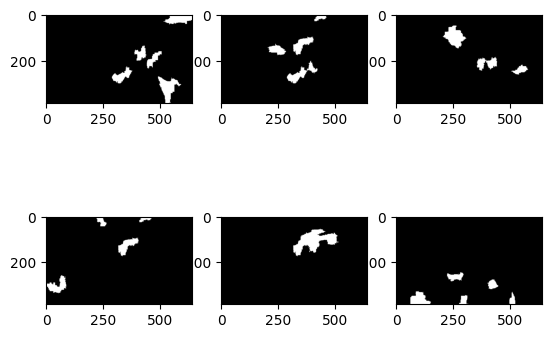

In [9]:
plt.figure()
fig, ax = plt.subplots(2,3)

ax[0,0].imshow(lime_cls_attrs[0].numpy().transpose(1,2,0))
ax[0,1].imshow(lime_cls_attrs[1].numpy().transpose(1,2,0))
ax[0,2].imshow(lime_cls_attrs[2].numpy().transpose(1,2,0))

ax[1,0].imshow(lime_seg_attrs[0].numpy().transpose(1,2,0))
ax[1,1].imshow(lime_seg_attrs[1].numpy().transpose(1,2,0))
ax[1,2].imshow(lime_seg_attrs[2].numpy().transpose(1,2,0))

In [10]:
intg_cls_exp = intg_cls(X, [0,1,2], num_steps=16, progress_bar=True)
intg_cls_attrs = intg_cls_exp.attributions

100%|██████████| 16/16 [00:00<00:00, 76.77it/s]


In [11]:
intg_seg_exp = intg_seg(X, [0,1,2], num_steps=16, progress_bar=True)
intg_seg_attrs = intg_seg_exp.attributions

100%|██████████| 16/16 [00:20<00:00,  1.26s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

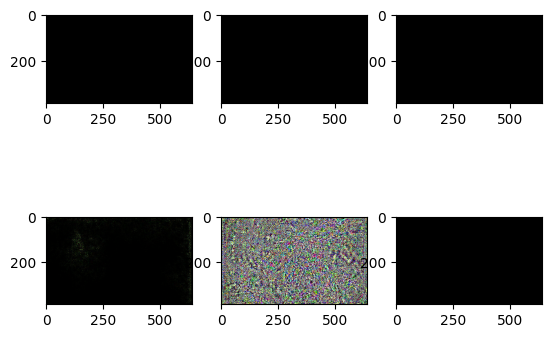

In [12]:
plt.figure()
fig, ax = plt.subplots(2,3)

ax[0,0].imshow(intg_cls_attrs[0].numpy().transpose(1,2,0))
ax[0,1].imshow(intg_cls_attrs[1].numpy().transpose(1,2,0))
ax[0,2].imshow(intg_cls_attrs[2].numpy().transpose(1,2,0))

ax[1,0].imshow(intg_seg_attrs[0].numpy().transpose(1,2,0))
ax[1,1].imshow(intg_seg_attrs[1].numpy().transpose(1,2,0))
ax[1,2].imshow(intg_seg_attrs[2].numpy().transpose(1,2,0))

In [13]:
################################################################################
################################################################################
################################################################################

In [14]:
shap_cls_exp = shap_cls(X, [0,1,2,1])
shap_cls_attrs = shap_cls_exp.attributions

Partition explainer: 4it [00:10, 10.15s/it]               


In [15]:
shap_cls_attrs.shape

torch.Size([3, 3, 384, 640])

In [16]:
shap_cls_attrs.max(), shap_cls_attrs.min()

(tensor(1.0929e-07, dtype=torch.float64),
 tensor(-1.1923e-07, dtype=torch.float64))

In [17]:
shap_seg_exp = shap_seg(X, [0,1,2,1])
shap_seg_attrs = shap_seg_exp.attributions

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 3/3 [02:04<00:00, 30.07s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 4it [03:10, 63.57s/it]                       


In [18]:
shap_seg_attrs.shape

torch.Size([3, 3, 384, 640])

In [19]:
shap_seg_attrs.min(), shap_seg_attrs.max()

(tensor(-0.0068, dtype=torch.float64), tensor(0.0671, dtype=torch.float64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

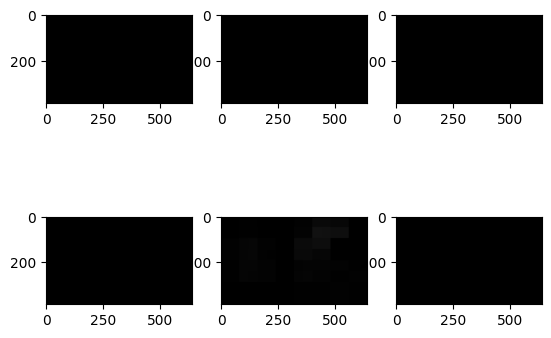

In [20]:
plt.figure()
fig, ax = plt.subplots(2,3)

ax[0,0].imshow(shap_cls_attrs[0].numpy().transpose(1,2,0))
ax[0,1].imshow(shap_cls_attrs[1].numpy().transpose(1,2,0))
ax[0,2].imshow(shap_cls_attrs[2].numpy().transpose(1,2,0))

ax[1,0].imshow(shap_seg_attrs[0].numpy().transpose(1,2,0))
ax[1,1].imshow(shap_seg_attrs[1].numpy().transpose(1,2,0))
ax[1,2].imshow(shap_seg_attrs[2].numpy().transpose(1,2,0))